In [2]:
# TODO: some of these are not needed, remove unused imports
import numpy as np
from scipy import sparse
import os
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load

In [3]:
def load_dataset(dir, time):
    """
    Loads specific timeframe of each replay
    """
    replays = []

    for path in os.listdir(dir):
        full_path = os.path.join(dir, path)
        print(full_path)
        if os.path.isfile(full_path):
            replays.append(np.asarray(sparse.load_npz(full_path).todense()))

    Y = []
    X = []
    for replay in replays:
        Y.append(replay[0, 0])
        X.append(replay[-time, 1:])

    Y = np.array(Y)
    X = np.array(X)

    return X, Y

Load in datasets

In [4]:
x_train, y_train = load_dataset(
    "/Users/mathiaskirkbonde/Documents/parsed_replays/GlobalFeatureVector/Terran_vs_Terran/Terran/train/",
    1,
)


1a5e8.SC2Replay.npz
/Users/mathiaskirkbonde/Documents/parsed_replays/GlobalFeatureVector/Terran_vs_Terran/Terran/train/1@5b04885a36ab8522d61149ee5d7e4a788fdf0c752efbaf199768401a0ca297ac.SC2Replay.npz
/Users/mathiaskirkbonde/Documents/parsed_replays/GlobalFeatureVector/Terran_vs_Terran/Terran/train/2@6697cc16b7ed372d94e57ea39c2c6e2db2a7719d08fcba29a5eeb18efe1ea6f4.SC2Replay.npz
/Users/mathiaskirkbonde/Documents/parsed_replays/GlobalFeatureVector/Terran_vs_Terran/Terran/train/2@45c743baaebd498f42fac202468cbeebfffcfd065bae26bcedbe74213f190134.SC2Replay.npz
/Users/mathiaskirkbonde/Documents/parsed_replays/GlobalFeatureVector/Terran_vs_Terran/Terran/train/1@2ef9a2b2a7e857a67e0b5d615432917911f39be126f1ca9a0d3bcce0ed8b34c7.SC2Replay.npz
/Users/mathiaskirkbonde/Documents/parsed_replays/GlobalFeatureVector/Terran_vs_Terran/Terran/train/2@6a672a1d1ae7765228946fd43082eb3a370f7965feceb31eb49704d48b245eb8.SC2Replay.npz
/Users/mathiaskirkbonde/Documents/parsed_replays/GlobalFeatureVector/Terran_vs_T

In [5]:

x_test, y_test = load_dataset(
    "/Users/mathiaskirkbonde/Documents/parsed_replays/GlobalFeatureVector/Terran_vs_Terran/Terran/valuation/",
    1,
)

/GlobalFeatureVector/Terran_vs_Terran/Terran/test/2@be0a8d5ff0648cfed335855bd19374668f48a8e99a17804b1ee3adb545e5a55d.SC2Replay.npz
/Users/mathiaskirkbonde/Documents/parsed_replays/GlobalFeatureVector/Terran_vs_Terran/Terran/test/1@d7b304181a6d1d6aed74beeed406e3f134c14181635d4ef747242a083795c25c.SC2Replay.npz
/Users/mathiaskirkbonde/Documents/parsed_replays/GlobalFeatureVector/Terran_vs_Terran/Terran/test/2@8cfbd3134b7a27808b0039ad5a243fe0ac525574a760f5bda3ac746e85ba9e55.SC2Replay.npz
/Users/mathiaskirkbonde/Documents/parsed_replays/GlobalFeatureVector/Terran_vs_Terran/Terran/test/1@aa70c7877b35d8cfd35d6de9c63f004fc8f01e73a0832facbb7c69281a359988.SC2Replay.npz
/Users/mathiaskirkbonde/Documents/parsed_replays/GlobalFeatureVector/Terran_vs_Terran/Terran/test/2@2caa133847370943c341a565a8ef6875d39660bfc10d3f06f1dd5026a598f04f.SC2Replay.npz
/Users/mathiaskirkbonde/Documents/parsed_replays/GlobalFeatureVector/Terran_vs_Terran/Terran/test/1@ce570951ceb2cd334a6edc2786760a61b20b181fd5599e54c3701

Train random forest and decision tree

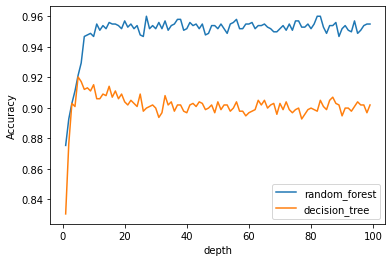

In [6]:
depth_error = {
    "random_forest": [[], []],
    "decision_tree": [[], []],
}


for depth in range(1, 100):
    random_forest = RandomForestClassifier(max_depth=depth)
    decision_tree = tree.DecisionTreeClassifier(max_depth=depth)
    
    
    random_forest = random_forest.fit(x_train, y_train)
    decision_tree = decision_tree.fit(x_train, y_train)

    depth_error["random_forest"][0].append(depth)
    depth_error["random_forest"][1].append(random_forest.score(x_test, y_test))

    depth_error["decision_tree"][0].append(depth)
    depth_error["decision_tree"][1].append(decision_tree.score(x_test, y_test))

# plot accuracies
import matplotlib.pyplot as plt

for classifier in depth_error:
    plt.plot(depth_error[classifier][0], depth_error[classifier][1], label=classifier)

plt.xlabel("depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

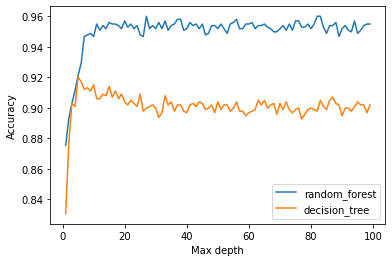

26
4


In [18]:
for classifier in depth_error:
    plt.plot(depth_error[classifier][0], depth_error[classifier][1], label=classifier)

plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig('hp_tuning.pgf', dpi=400)
plt.show()

rf_best_depth = depth_error["random_forest"][1].index(max(depth_error["random_forest"][1]))
dt_best_depth = depth_error["decision_tree"][1].index(max(depth_error["decision_tree"][1]))

print(rf_best_depth)
print(dt_best_depth)

In [34]:
# Random forest
random_forest = RandomForestClassifier(max_depth=26, random_state=0)
# Decision tree
decision_tree = tree.DecisionTreeClassifier(max_depth=dt_best_depth)


random_forest = random_forest.fit(x_train, y_train)
decision_tree = decision_tree.fit(x_train, y_train)

print(random_forest.score(x_test, y_test))
print(decision_tree.score(x_test, y_test))

0.95097037793667
0.9009193054136875


Save model

In [33]:
dump(random_forest, "./models/random_forest.joblib")
dump(decision_tree, "./models/decision_tree.joblib")

['./models/decision_tree.joblib']